# Day 8: Rotary Positional Embeddings (RoPE)

- In two days, we explored what positional embeddings are and even coded it. 
- Today, we are diving into a more advanced and powerful concept used in many state-of-the-art models: Rotary Positional Embeddings (RoPE)

## Recap: Why Transformers Need Positional Embeddings 
- Transformers process token in parallel, which makes them efficient, but it also means they don't inherently know the order of tokens. 
- To a transformer, these sentences look identical: 
    - "The cat sat on the mat"
    - "The mat sat on the cat"
- That is a problem. Order matters, especially in language. 
- To fix this, we add positional embeddings to inform the model about token positions. 

## Traditional Positional Embeddings 
- Two popular approaches: 
    - Learned positional embeddings: 
        - Each position (1,2,3..) gets a trainable vector. 
    - Sinusoidal embeddings:
        - Use sin/cos functions to generate fixed vectors per position. 
- But they have limitations: 
    - Fixed or learned per-position (no flexibility)
    - Poor generalization to longer sequences 
    - Don't integrate naturally with attention scores 

## What is RoPE and Why is it Better? 
- RoPE was introduced in RoFormer (at 2021) and is now used in models like LLaMA and DeepSeek. 
- Instead pf adding a position vector, RoPE rotates token embeddings in space based on their position, directly inside the attention mechanism. (on query and key vectors)
- This encodes relative position information in a more elegant and flexible way. 
- For each position, the token embedding is rotated by an angle proportional to that position. 
- A simplified pseudocode: 

In [ ]:
for i in range(0, dim, 2):
    x1, x2 = x[i], x[i+1]
    angle = theta * position 
    x[i] = x1 * cos(angle) - x2 * sin(angle)
    x[i+1] = x1 * sin(angle) + x2 * cos(angle)

- This allows attention to naturally reflect how far apart two tokens are, something traditional embeddings can't do. 

## RoPE vs Traditional Positional Embeddings 
- 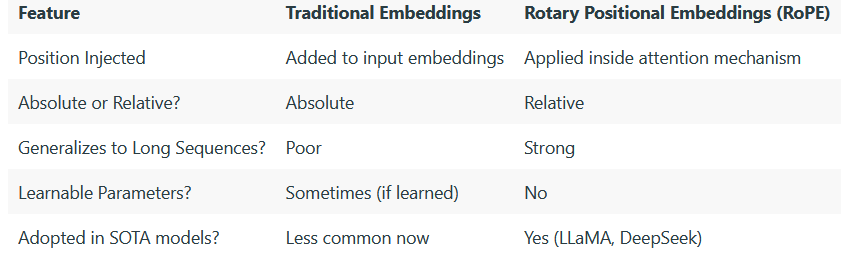

## Why RoPE is so Useful
- Encodes relative positions directly in attention scores 
- No extra parameters --it's deterministic 
- Handles long sequences more gracefully
- Simple implementation using trigonometric rotation 

# Final Thoughts 
- Rotary Positional Embeddings are an elegant solution to a core transformer weakness. 
- If we are building models for long documents, code or stories, RoPE should be on our radar. 